<a href="https://colab.research.google.com/github/sumeetku/Amber-detector/blob/main/license_plate_reader_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import cv2
import numpy as np
import tensorflow as tf
import imutils
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

In [88]:
img=cv2.imread('test2.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

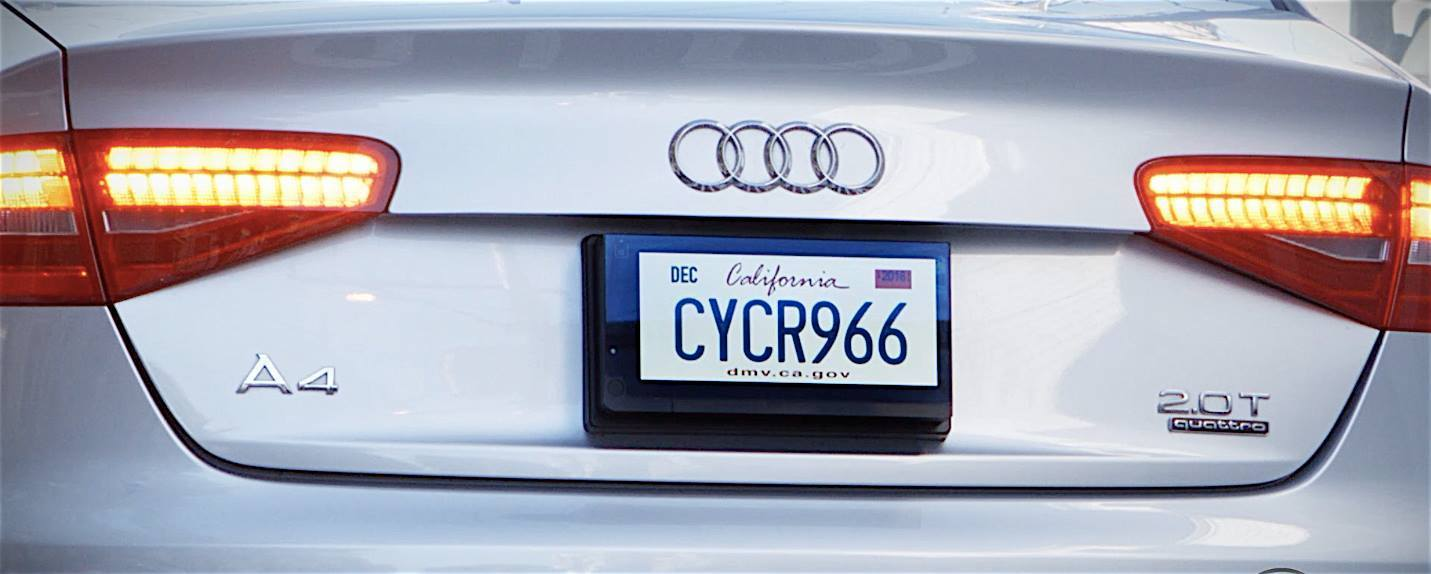

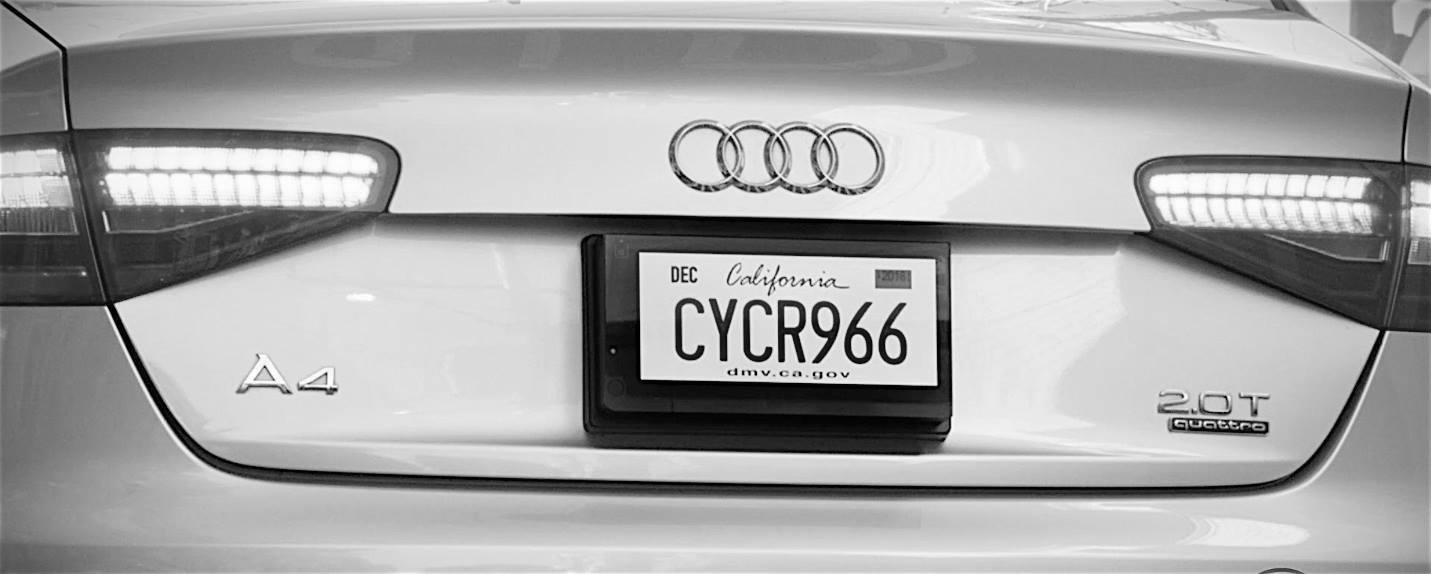

In [89]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(gray)

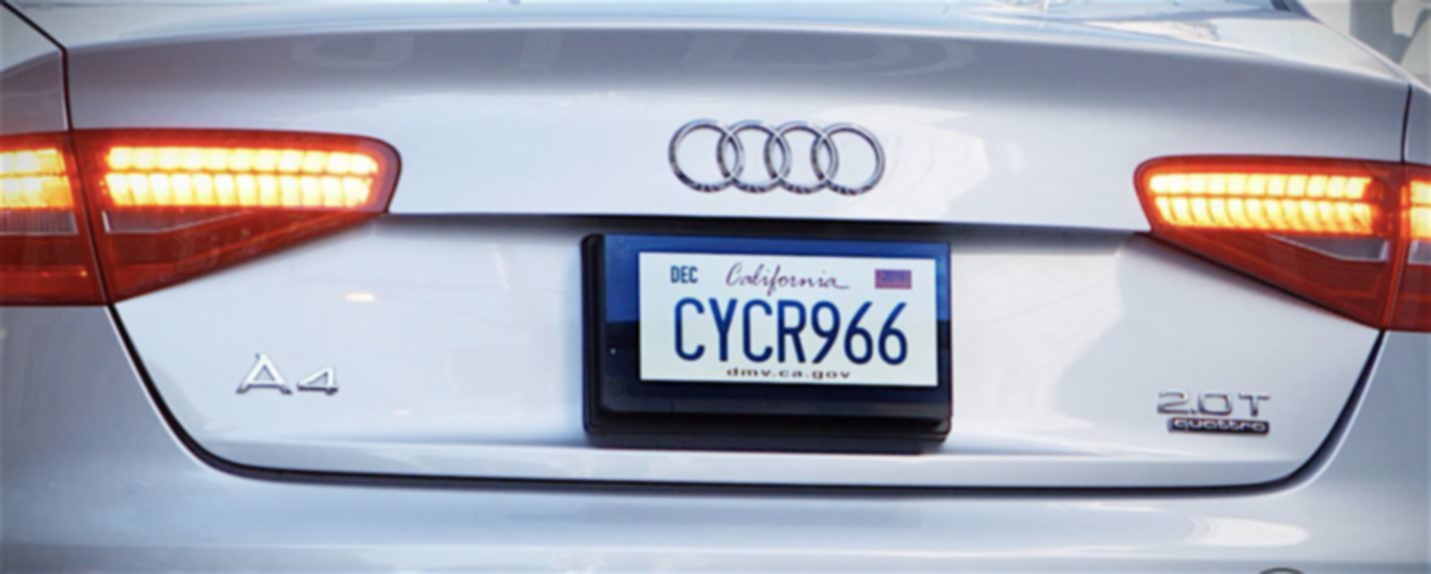

In [90]:
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0) 
cv2_imshow(imgBlurred)

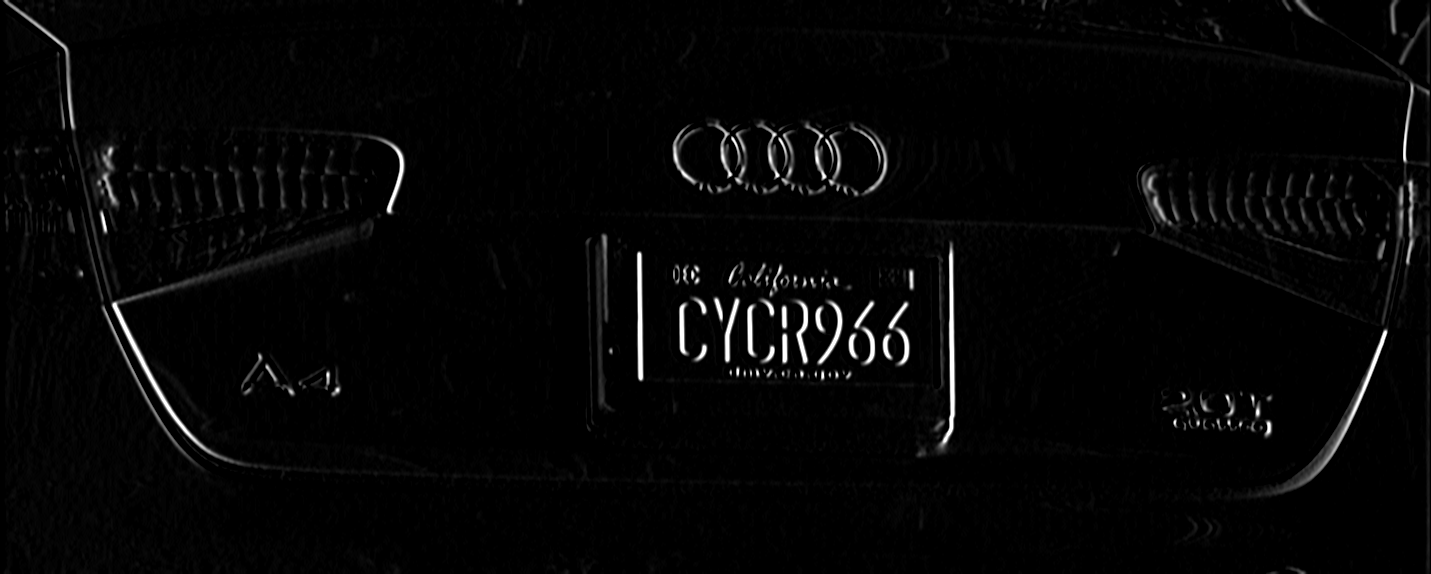

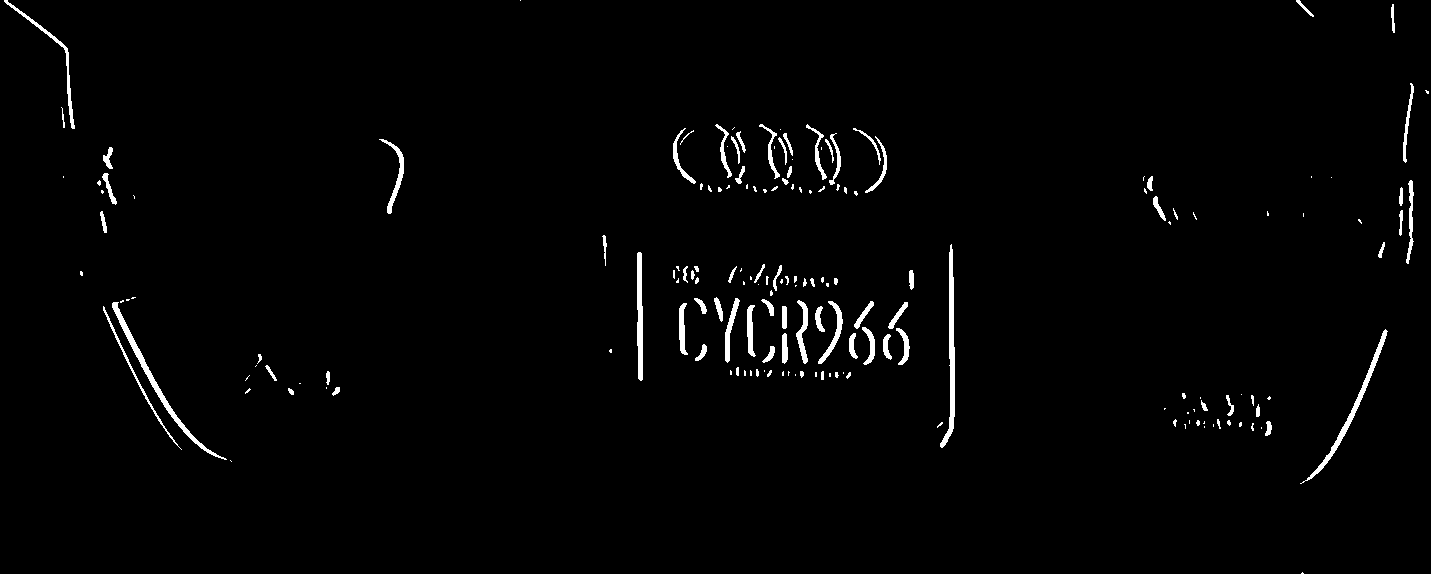

In [91]:
gray = cv2.cvtColor(imgBlurred,cv2.COLOR_BGR2GRAY)  
sobelx = cv2.Sobel(gray, cv2.CV_8U,  
                       1, 0, ksize = 3)   
cv2_imshow(sobelx)
ret2, threshold_img = cv2.threshold(sobelx,0, 255, 
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
cv2_imshow(threshold_img)

In [92]:
morph_n_thresholded_img = threshold_img.copy() 
cv2.morphologyEx(src = threshold_img, 
                     op = cv2.MORPH_CLOSE, 
                     kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22, 3)),  
                     dst = morph_n_thresholded_img) 

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [93]:
def preprocess(input_img): 
  
    imgBlurred = cv2.GaussianBlur(input_img, (7, 7), 0) 
      
    # convert to gray 
    gray = cv2.cvtColor(imgBlurred, 
                        cv2.COLOR_BGR2GRAY)  
      
    # sobelX to get the vertical edges 
    sobelx = cv2.Sobel(gray, cv2.CV_8U,  
                       1, 0, ksize = 3)   
      
     # otsu's thresholding 
    ret2, threshold_img = cv2.threshold(sobelx,0, 255, 
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
 
    element_structure = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22, 3))
    morph_n_thresholded_img = threshold_img.copy() 
    cv2.morphologyEx(src = threshold_img, 
                     op = cv2.MORPH_CLOSE, 
                     kernel = element_structure,  
                     dst = morph_n_thresholded_img) 
      
    return morph_n_thresholded_img 

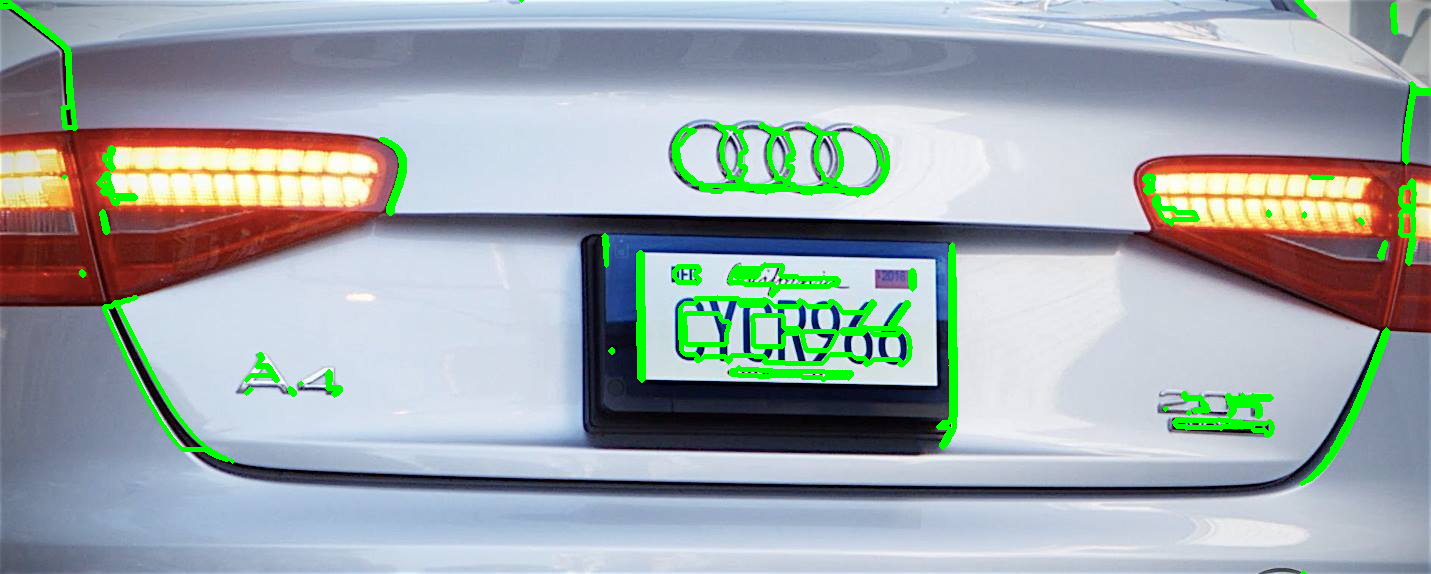

-1

In [94]:
contours1,_=cv2.findContours(morph_n_thresholded_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img1=img.copy()
cv2.drawContours(img1, contours1, -1, (0,255,0), 3)
cv2_imshow(img1)
cv2.waitKey()

In [1]:
! apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,502 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../tesserac

In [2]:
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (2,101 kB/s)
Selecting previously unselected package libleptonica-dev.
(Reading database ... 144840 files and directories currently installed.)
Preparing to unpack .../libleptonica-dev_1.75.3-3_amd64.deb ...
Unpacking libleptonica-dev (1.75.3-3) ...
Selecting previously unselected package libtesseract-dev.
Preparing to unpack .../libte

In [3]:
! pip install Pillow
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=145e74209af7ab8cde3159deb03378c4160cc6ddeb04cee4306983aeb8ef20d3
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [96]:
img=cv2.imread('test2.jpg')
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0) 

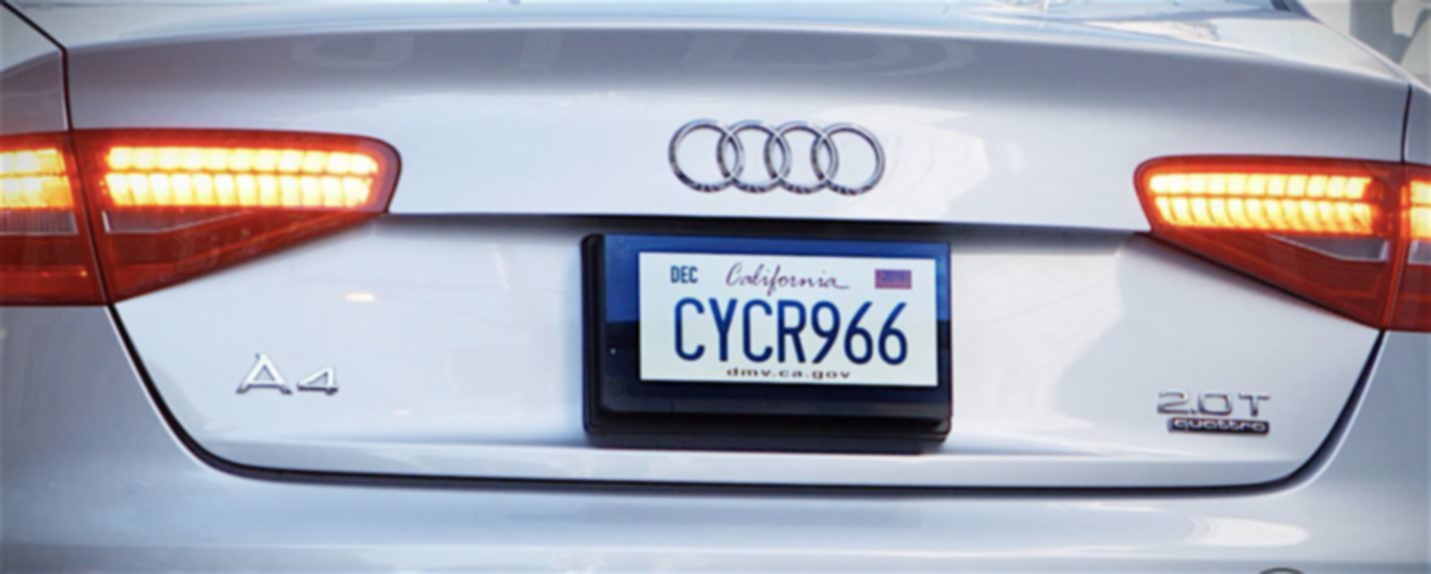

In [87]:
cv2_imshow(imgBlurred)

# Reading license plate using tesseract module


In [97]:
plate=t=pytesseract.image_to_string(imgBlurred,lang ='eng')

In [98]:
plate.replace(":", "").replace("-", "").split()

['CYCR966']

In [50]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=c0784b58f7d9f7ba513d20982687e22a2e50685e44bbd2451f4a9f77f6c7798b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [52]:
!wget http://www.zemris.fer.hr/projects/LicensePlates/english/baza_slika.zip

--2020-11-17 13:01:53--  http://www.zemris.fer.hr/projects/LicensePlates/english/baza_slika.zip
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34291395 (33M) [application/zip]
Saving to: ‘baza_slika.zip’

baza_slika.zip      100%[===================>]  32.70M  14.0MB/s    in 2.3s    

2020-11-17 13:01:55 (14.0 MB/s) - ‘baza_slika.zip’ saved [34291395/34291395]



In [53]:
ls

baza_slika.zip  sample_data/  test2.jpg  test.jpg


In [55]:
ls

040603/  141002/  180902/  280503/         komentar.txt  test2.jpg
070603/  170902/  210503/  baza_slika.zip  sample_data/  test.jpg
